# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

`**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [158]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')


In [159]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [160]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [161]:
# Try loading one file
trip_records_jan = pd.read_parquet('trip_records/2023-1.parquet')
trip_records_jan.info()

FileNotFoundError: [Errno 2] No such file or directory: 'trip_records/2023-1.parquet'

In [ ]:
trip_records_jan['pickup_datetime'] = pd.to_datetime(trip_records_jan['tpep_pickup_datetime'])
trip_records_jan['dropoff_datetime'] = pd.to_datetime(trip_records_jan['tpep_dropoff_datetime'])

In [ ]:
trip_records_jan['pickup_month'] = trip_records_jan.pickup_datetime.dt.month
trip_records_jan['pickup_date'] = trip_records_jan.pickup_datetime.dt.date
trip_records_jan['pickup_hour'] = trip_records_jan.pickup_datetime.dt.hour

In [ ]:
trip_records_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
test = trip_records_jan.groupby(['pickup_date', 'pickup_hour'])
sample = test.sample(frac = 0.05, random_state = 42)
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152087 entries, 8048 to 2992985
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               152087 non-null  int64         
 1   tpep_pickup_datetime   152087 non-null  datetime64[us]
 2   tpep_dropoff_datetime  152087 non-null  datetime64[us]
 3   passenger_count        148441 non-null  float64       
 4   trip_distance          152087 non-null  float64       
 5   RatecodeID             148441 non-null  float64       
 6   store_and_fwd_flag     148441 non-null  object        
 7   PULocationID           152087 non-null  int64         
 8   DOLocationID           152087 non-null  int64         
 9   payment_type           152087 non-null  int64         
 10  fare_amount            152087 non-null  float64       
 11  extra                  152087 non-null  float64       
 12  mta_tax                152087 non-null  float

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        current_df = pd.read_parquet(file_name)
        
        current_df['pickup_datetime'] = pd.to_datetime(current_df['tpep_pickup_datetime'])
        current_df['pickup_date'] = current_df.pickup_datetime.dt.date
        current_df['pickup_hour'] = current_df.pickup_datetime.dt.hour

        hour_data = current_df.groupby(['pickup_date', 'pickup_hour'])



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        sampled_data = hour_data.sample(frac = 0.05, random_state = 42)

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991327 entries, 8048 to 3194412
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
df.head()

In [ ]:
# Store the df in csv/parquet
df.to_parquet('trip_records/sampled_data.parquet')

NameError: name 'df' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
sampled_dataframe = pd.read_parquet('trip_records/sampled_data.parquet')
sampled_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 8048 to 2706381
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

In [ ]:
sampled_dataframe.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8048            2  2022-12-31 23:36:04   2022-12-31 23:43:31              1.0   
2995107         1  2023-01-01 00:59:47   2023-01-01 01:23:42              NaN   
1013            2  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
3738            2  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
1985            1  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
8048              1.69         1.0                  N            43   
2995107           0.00         NaN               None            68   
1013              0.99         1.0                  N           144   
3738              0.92         1.0                  N            79   
1985              2.30         1.0                  Y            48   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
8048              141             1  ...        3.00           0.0   
2995107            45             0  ...        0.00           0.0   
1013              211             2  ...        0.00           0.0   
3738              107             1  ...        3.05           0.0   
1985              238             1  ...        4.60           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
8048                       1.0         18.00                   2.5   
2995107                    1.0         39.30                   NaN   
1013                       1.0         12.20                   2.5   
3738                       1.0         15.25                   2.5   
1985                       1.0         23.10                   2.5   

         airport_fee     pickup_datetime  pickup_date  pickup_hour Airport_fee  
8048             0.0 2022-12-31 23:36:04   2022-12-31           23         NaN  
2995107          NaN 2023-01-01 00:59:47   2023-01-01            0         NaN  
1013             0.0 2023-01-01 00:18:34   2023-01-01            0         NaN  
3738             0.0 2023-01-01 00:32:27   2023-01-01            0         NaN  
1985             0.0 2023-01-01 00:26:11   2023-01-01            0         NaN  

[5 rows x 23 columns]

In [ ]:
sampled_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 8048 to 2706381
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
sampled_dataframe.reset_index(drop=True, inplace=True)
sampled_dataframe.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:36:04   2022-12-31 23:43:31              1.0   
1         1  2023-01-01 00:59:47   2023-01-01 01:23:42              NaN   
2         2  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
3         2  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
4         1  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.69         1.0                  N            43           141   
1           0.00         NaN               None            68            45   
2           0.99         1.0                  N           144           211   
3           0.92         1.0                  N            79           107   
4           2.30         1.0                  Y            48           238   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...        3.00           0.0                    1.0   
1             0  ...        0.00           0.0                    1.0   
2             2  ...        0.00           0.0                    1.0   
3             1  ...        3.05           0.0                    1.0   
4             1  ...        4.60           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee     pickup_datetime  \
0         18.00                   2.5          0.0 2022-12-31 23:36:04   
1         39.30                   NaN          NaN 2023-01-01 00:59:47   
2         12.20                   2.5          0.0 2023-01-01 00:18:34   
3         15.25                   2.5          0.0 2023-01-01 00:32:27   
4         23.10                   2.5          0.0 2023-01-01 00:26:11   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 23 columns]

In [ ]:
sampled_dataframe.drop(columns= 'store_and_fwd_flag', inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
# Changing NaN values to 0
sampled_dataframe['Airport_fee'] = sampled_dataframe['airport_fee'].fillna(0) + sampled_dataframe['Airport_fee'].fillna(0)
sampled_dataframe.drop(columns= 'airport_fee', inplace=True)


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
sampled_dataframe[sampled_dataframe['fare_amount'] < 0]



Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_datetime, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
#No negative fare amounts to analyse RatecodeID


In [ ]:
# Find which columns have negative values
nm_columns = [col for col in sampled_dataframe if sampled_dataframe[col].dtype.name == 'float64' or sampled_dataframe[col].dtype.name == 'int64'] 
sampled_dataframe[sampled_dataframe[nm_columns] < 0].count()


VendorID                  0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     2
mta_tax                  80
tip_amount                0
tolls_amount              0
improvement_surcharge    88
total_amount             88
congestion_surcharge     56
pickup_datetime           0
pickup_date               0
pickup_hour               0
Airport_fee              26
dtype: int64

In [ ]:
# fix these negative values
for col in nm_columns:
    sampled_dataframe[col] = np.where(sampled_dataframe[col] < 0, sampled_dataframe[col].mean(), sampled_dataframe[col])


In [ ]:
#verifying if negative values again
sampled_dataframe[sampled_dataframe[nm_columns] < 0].count()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_datetime          0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
len(sampled_dataframe)

1896400

In [ ]:
# Find the proportion of missing values in each column
missing_values = sampled_dataframe.isnull().sum()
percentage_missing = (missing_values / len(sampled_dataframe)) * 100
percentage_missing

VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.42549
trip_distance            0.00000
RatecodeID               3.42549
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.42549
pickup_datetime          0.00000
pickup_date              0.00000
pickup_hour              0.00000
Airport_fee              0.00000
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
null_passenger_count_df = sampled_dataframe['passenger_count'].isnull()
null_passenger_count_df

0          False
1           True
2          False
3          False
4          False
           ...  
1896395    False
1896396    False
1896397    False
1896398    False
1896399    False
Name: passenger_count, Length: 1896400, dtype: bool

In [ ]:
sampled_dataframe['passenger_count'].mean()

1.3697322160334033

In [ ]:
# Mean Value is not a whole number
sampled_dataframe['passenger_count'].median()

1.0

In [ ]:
# Impute NaN values in 'passenger_count'

sampled_dataframe['passenger_count'] = sampled_dataframe['passenger_count'].fillna(sampled_dataframe['passenger_count'].median())

Did you find zeroes in passenger_count? Handle these.

In [ ]:
sampled_dataframe[sampled_dataframe['passenger_count'] == 0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
443           1.0  2023-01-01 01:34:03   2023-01-01 01:53:38              0.0   
467           1.0  2023-01-01 01:39:29   2023-01-01 01:58:34              0.0   
548           1.0  2023-01-01 01:13:39   2023-01-01 01:29:07              0.0   
641           1.0  2023-01-01 02:35:58   2023-01-01 02:54:14              0.0   
679           1.0  2023-01-01 02:41:47   2023-01-01 02:48:14              0.0   
...           ...                  ...                   ...              ...   
1896061       1.0  2023-09-30 23:00:40   2023-09-30 23:05:54              0.0   
1896256       1.0  2023-09-30 23:11:47   2023-09-30 23:26:44              0.0   
1896282       1.0  2023-09-30 23:48:42   2023-10-01 00:26:16              0.0   
1896349       1.0  2023-09-30 23:17:35   2023-09-30 23:43:41              0.0   
1896376       1.0  2023-09-30 23:08:26   2023-09-30 23:22:10              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
443                3.7         1.0         186.0         239.0           1.0   
467                2.1         1.0         113.0         232.0           1.0   
548                2.9         1.0         231.0         170.0           1.0   
641                8.0         1.0         263.0         261.0           2.0   
679                0.8         1.0         161.0         233.0           2.0   
...                ...         ...           ...           ...           ...   
1896061            1.0         1.0         239.0         238.0           1.0   
1896256            0.9         1.0         163.0         230.0           1.0   
1896282            6.4         1.0         230.0         116.0           1.0   
1896349            4.3         1.0         249.0         237.0           1.0   
1896376            2.0         1.0          48.0         107.0           1.0   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
443             21.2  ...      0.5         5.2           0.0   
467             18.4  ...      0.5         0.0           0.0   
548             17.0  ...      0.5         4.4           0.0   
641             33.1  ...      0.5         0.0           0.0   
679              7.9  ...      0.5         0.0           0.0   
...              ...  ...      ...         ...           ...   
1896061          7.2  ...      0.5         1.5           0.0   
1896256         13.5  ...      0.5         3.7           0.0   
1896282         38.0  ...      0.5         2.0           0.0   
1896349         26.1  ...      0.5         6.2           0.0   
1896376         14.2  ...      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
443                        1.0          31.4                   2.5   
467                        1.0          23.4                   2.5   
548                        1.0          26.4                   2.5   
641                        1.0          38.1                   2.5   
679                        1.0          12.9                   2.5   
...                        ...           ...                   ...   
1896061                    1.0          13.7                   2.5   
1896256                    1.0          22.2                   2.5   
1896282                    1.0          45.0                   2.5   
1896349                    1.0          37.3                   2.5   
1896376                    1.0          19.2                   2.5   

            pickup_datetime pickup_date pickup_hour  Airport_fee  
443     2023-01-01 01:34:03  2023-01-01           1          0.0  
467     2023-01-01 01:39:29  2023-01-01           1          0.0  
548     2023-01-01 01:13:39  2023-01-01           1          0.0  
641     2023-01-01 02:35:58  2023-01-01           2          0.0  
679     2023-01-01 02:41:47  2023-01-01           2          0.0  
...                     ...         ...         ...          ..

In [ ]:
#Replacing the zeros in passenger_count with median value
sampled_dataframe[sampled_dataframe['passenger_count'] == 0]
sampled_dataframe['passenger_count'] = np.where(sampled_dataframe['passenger_count'] == 0, sampled_dataframe['passenger_count'].median(), sampled_dataframe['passenger_count'])

In [ ]:
#No Zero Values in passenger_count
sampled_dataframe[sampled_dataframe['passenger_count'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, pickup_datetime, pickup_date, pickup_hour, Airport_fee]
Index: []

[0 rows x 21 columns]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:

sampled_dataframe['RatecodeID'].value_counts()

RatecodeID
1.0     1727956
2.0       72513
99.0      10724
5.0       10528
3.0        5928
4.0        3788
6.0           2
Name: count, dtype: int64

In [ ]:
# Fix missing values in 'RatecodeID'
#filling the missng values with Mode 
sampled_dataframe['RatecodeID'] = sampled_dataframe['RatecodeID'].fillna(sampled_dataframe['RatecodeID'].median())

In [ ]:
sampled_dataframe['RatecodeID'].median()

1.0

In [ ]:
sampled_dataframe.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64961
pickup_datetime              0
pickup_date                  0
pickup_hour                  0
Airport_fee                  0
dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
sampled_dataframe['congestion_surcharge'].mean()
sampled_dataframe['congestion_surcharge'] = sampled_dataframe['congestion_surcharge'].fillna(sampled_dataframe['congestion_surcharge'].mean())


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
sampled_dataframe.isnull().sum()


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickup_datetime          0
pickup_date              0
pickup_hour              0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
sampled_dataframe.describe()
# Check for potential out of place values in various columns
for col in nm_columns:
    Q1 = sampled_dataframe[col].quantile(0.25)
    Q3 = sampled_dataframe[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Outlier Count
    outlier_count = sampled_dataframe[(sampled_dataframe[col] < lower_bound) | (sampled_dataframe[col] > upper_bound)].shape[0]
    print(f"{col} has {outlier_count} outliers")

VendorID has 0 outliers
passenger_count has 424324 outliers
trip_distance has 242677 outliers
RatecodeID has 103303 outliers
PULocationID has 0 outliers
DOLocationID has 0 outliers
payment_type has 338433 outliers
fare_amount has 193238 outliers
extra has 33511 outliers
mta_tax has 17179 outliers
tip_amount has 142583 outliers
tolls_amount has 149754 outliers
improvement_surcharge has 1316 outliers
total_amount has 216475 outliers
congestion_surcharge has 140248 outliers
Airport_fee has 161888 outliers


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
sampled_dataframe = sampled_dataframe[sampled_dataframe['passenger_count'] <= 6]

In [ ]:
sampled_dataframe.shape

(1896382, 21)

In [ ]:
sampled_dataframe[(sampled_dataframe['trip_distance']) < 1 & (sampled_dataframe['fare_amount'] > 300)].shape

(38, 21)

In [ ]:
# Continue with outlier handling
# Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
sampled_dataframe.drop(sampled_dataframe[(sampled_dataframe['trip_distance']) < 1 & (sampled_dataframe['fare_amount'] > 300)].index, inplace=True)
sampled_dataframe.shape



(1896344, 21)

In [ ]:
sampled_dataframe[(sampled_dataframe['fare_amount'] == 0) & (sampled_dataframe['PULocationID'] != sampled_dataframe['DOLocationID'])]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
18489         2.0  2023-01-05 15:46:13   2023-01-05 16:51:38              1.0   
21678         2.0  2023-01-06 08:27:31   2023-01-06 08:54:19              1.0   
26709         1.0  2023-01-07 03:25:19   2023-01-07 03:25:19              1.0   
32194         2.0  2023-01-08 07:49:53   2023-01-08 08:05:24              1.0   
40936         1.0  2023-01-10 10:08:37   2023-01-10 11:19:04              1.0   
...           ...                  ...                   ...              ...   
1870320       1.0  2023-09-26 14:36:46   2023-09-26 14:57:01              1.0   
1871317       1.0  2023-09-26 17:54:04   2023-09-26 17:54:04              1.0   
1888438       1.0  2023-09-29 16:21:20   2023-09-29 17:56:40              1.0   
1889183       1.0  2023-09-29 18:32:07   2023-09-29 19:26:50              1.0   
1895771       1.0  2023-09-30 22:58:36   2023-09-30 22:59:34              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
18489            15.50         2.0         148.0         132.0           2.0   
21678            10.83         1.0         233.0         138.0           2.0   
26709             0.00         5.0         114.0         264.0           2.0   
32194             0.00         2.0         237.0          95.0           2.0   
40936            42.00         5.0         132.0           1.0           4.0   
...                ...         ...           ...           ...           ...   
1870320           4.70        99.0         135.0         102.0           1.0   
1871317           0.00         5.0         265.0         264.0           2.0   
1888438           7.20        99.0          45.0          77.0           1.0   
1889183          16.60         5.0         230.0         132.0           4.0   
1895771           1.80         1.0         164.0         186.0           4.0   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
18489            0.0  ...      0.5         0.0           0.0   
21678            0.0  ...      0.5         0.0           0.0   
26709            0.0  ...      0.0         0.0           0.0   
32194            0.0  ...      0.5         0.0           0.0   
40936            0.0  ...      0.0         0.0           0.0   
...              ...  ...      ...         ...           ...   
1870320          0.0  ...      0.0         0.0           0.0   
1871317          0.0  ...      0.0         0.0           0.0   
1888438          0.0  ...      0.0         0.0           0.0   
1889183          0.0  ...      0.0         0.0           0.0   
1895771          0.0  ...      0.0         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
18489                      1.0          4.00                   2.5   
21678                      1.0          5.25                   2.5   
26709                      0.0          0.00                   0.0   
32194                      1.0          4.00                   2.5   
40936                      1.0          2.25                   0.0   
...                        ...           ...                   ...   
1870320                    0.0          0.00                   0.0   
1871317                    0.0          0.00                   0.0   
1888438                    0.0          0.00                   0.0   
1889183                    1.0          1.00                   0.0   
1895771                    0.0          0.00                   0.0   

            pickup_datetime pickup_date pickup_hour  Airport_fee  
18489   2023-01-05 15:46:13  2023-01-05          15         0.00  
21678   2023-01-06 08:27:31  2023-01-06           8         1.25  
26709   2023-01-07 03:25:19  2023-01-07           3         0.00  
32194   2023-01-08 07:49:53  2023-01-08           7         0.00  
40936   2023-01-10 10:08:37  2023-01-10          10         1.25  
...                     ...         ...         ...          ..

In [ ]:
# Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
sampled_dataframe.drop(sampled_dataframe[(sampled_dataframe['fare_amount'] == 0) & (sampled_dataframe['PULocationID'] != sampled_dataframe['DOLocationID'])].index, inplace=True)
sampled_dataframe.shape

(1896069, 21)

In [ ]:
sampled_dataframe[sampled_dataframe['trip_distance'] > 250].shape

(44, 21)

In [ ]:
#Entries where `trip_distance` is more than 250  miles.
sampled_dataframe.drop(sampled_dataframe[sampled_dataframe['trip_distance'] > 250].index, inplace=True)
sampled_dataframe.shape

(1896025, 21)

In [ ]:
# Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
sampled_dataframe[sampled_dataframe['payment_type'] == 0].shape

(64918, 21)

In [ ]:
# Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
sampled_dataframe.drop(sampled_dataframe[sampled_dataframe['payment_type'] == 0].index, inplace=True)
sampled_dataframe.shape

(1831107, 21)

In [ ]:
# Do any columns need standardising?
sampled_dataframe.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1831107 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           float64       
 7   DOLocationID           float64       
 8   payment_type           float64       
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_datetime        datetime64[us]
 18  pickup_date            obje

In [ ]:
for col in nm_columns:
    Q1 = sampled_dataframe[col].quantile(0.25)
    Q3 = sampled_dataframe[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #Outlier Count
    outlier_count = sampled_dataframe[(sampled_dataframe[col] < lower_bound) | (sampled_dataframe[col] > upper_bound)].shape[0]
    print(f"{col} has {outlier_count} outliers")

VendorID has 0 outliers
passenger_count has 424324 outliers
trip_distance has 242677 outliers
RatecodeID has 103303 outliers
PULocationID has 0 outliers
DOLocationID has 0 outliers
payment_type has 338433 outliers
fare_amount has 193238 outliers
extra has 33511 outliers
mta_tax has 17179 outliers
tip_amount has 142583 outliers
tolls_amount has 149754 outliers
improvement_surcharge has 1316 outliers
total_amount has 216475 outliers
congestion_surcharge has 140248 outliers
Airport_fee has 161888 outliers


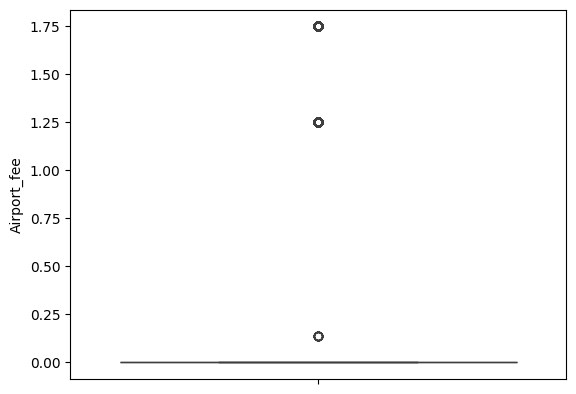

In [ ]:
import matplotlib.pyplot as plt 
sns.boxplot(sampled_dataframe['Airport_fee'])
plt.show()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
sampled_dataframe.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'pickup_datetime',
 'pickup_date',
 'pickup_hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? : Numerical


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
sampled_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831107 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           float64       
 7   DOLocationID           float64       
 8   payment_type           float64       
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_datetime        datetime64[us]
 18  pickup_date            obje

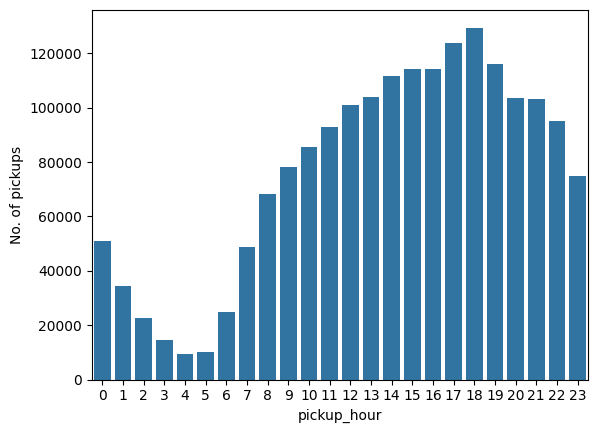

In [ ]:
# Find and show the hourly trends in taxi pickups
hourly = sampled_dataframe.groupby('pickup_hour').size()
sns.barplot(hourly)
plt.ylabel('No. of pickups')
plt.show()


In [ ]:
sampled_dataframe['pickup_month'] = sampled_dataframe.pickup_datetime.dt.month
sampled_dataframe['pickup_day_name'] = sampled_dataframe.pickup_datetime.dt.day_name()


In [ ]:
sampled_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831107 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           float64       
 7   DOLocationID           float64       
 8   payment_type           float64       
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  pickup_datetime        datetime64[us]
 18  pickup_date            obje

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

daily = sampled_dataframe.groupby('pickup_day_name').size()
sns.barplot(daily)
plt.ylabel('No. of pickups')
plt.show()


In [ ]:
# Show the monthly trends in pickups
monthly = sampled_dataframe.groupby('pickup_month').size()
sns.barplot(monthly)
plt.ylabel('No. of pickups')
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the fare_amount parameters
sampled_dataframe[sampled_dataframe['fare_amount'] == 0].shape
#Yes, Fare_amount has Zero/Negative values

(398, 23)

In [ ]:
# Analyse the tip_amount parameters
sampled_dataframe[sampled_dataframe['tip_amount'] == 0].shape
#Yes, tip_amount has Zero/Negative valuez

(409208, 23)

In [ ]:
# Analyse the total_amount parameters
sampled_dataframe[sampled_dataframe['total_amount'] <= 0].shape
#Yes, total_amount has Zero/Negative values

(211, 23)

In [ ]:
# Analyse the trip_distance parameters
sampled_dataframe[sampled_dataframe['trip_distance'] == 0].shape
#Yes, trip_distance has Zero/Negative values

(22053, 23)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes, We need to create df after removing zero values. However we can ignore the tip_amount as it is an optional to the passanger(If passanger want to give he will give)

Also, We can ignore trip_distance = 0 as the pickup and drop locations are same in a particular ride. 


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?
We can ignore trip_distance

In [ ]:
# Create a df with non zero entries for the selected parameters.

filtered_df = sampled_dataframe[(sampled_dataframe['fare_amount'] > 0) & (sampled_dataframe['total_amount'] >0)] 
filtered_df.shape



(1830709, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
filtered_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2022-12-31 23:36:04   2022-12-31 23:43:31              1.0   
2       2.0  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
3       2.0  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
4       1.0  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   
5       2.0  2023-01-01 00:10:09   2023-01-01 00:29:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.69         1.0          43.0         141.0           1.0   
2           0.99         1.0         144.0         211.0           2.0   
3           0.92         1.0          79.0         107.0           1.0   
4           2.30         1.0          48.0         238.0           1.0   
5           2.27         1.0          68.0         137.0           1.0   

   fare_amount  ...  improvement_surcharge  total_amount  \
0         10.0  ...                    1.0         18.00   
2          7.2  ...                    1.0         12.20   
3          7.2  ...                    1.0         15.25   
4         13.5  ...                    1.0         23.10   
5         18.4  ...                    1.0         28.08   

   congestion_surcharge     pickup_datetime  pickup_date  pickup_hour  \
0                   2.5 2022-12-31 23:36:04   2022-12-31           23   
2                   2.5 2023-01-01 00:18:34   2023-01-01            0   
3                   2.5 2023-01-01 00:32:27   2023-01-01            0   
4                   2.5 2023-01-01 00:26:11   2023-01-01            0   
5                   2.5 2023-01-01 00:10:09   2023-01-01            0   

   Airport_fee pickup_month pickup_day  pickup_day_name  
0          0.0           12         31         Saturday  
2          0.0            1          1           Sunday  
3          0.0            1          1           Sunday  
4          0.0            1          1           Sunday  
5          0.0            1          1           Sunday  

[5 rows x 24 columns]

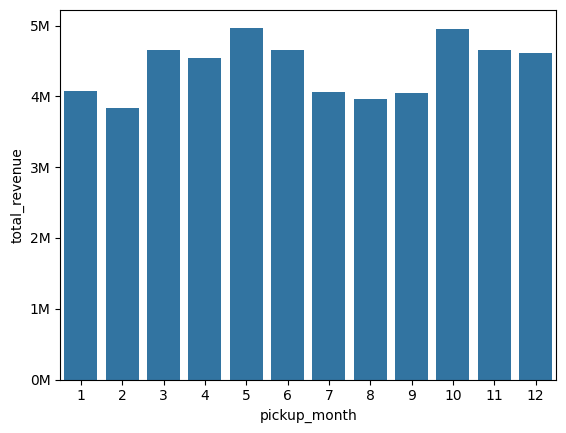

In [ ]:
# Group data by month and analyse monthly revenue
monthly_rev = filtered_df.groupby('pickup_month')['total_amount'].sum()
sns.barplot(x=monthly_rev.index, y= monthly_rev.values)
ticks = np.arange(0, 6000000, 1000000)
labels = ["{}M".format(i//1000000) for i in ticks]
#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=90)
plt.yticks(ticks, labels)
plt.ylabel('total_revenue')
plt.show()


In [ ]:
monthly_rev = filtered_df.groupby('pickup_month')['total_amount'].sum()
monthly_rev

pickup_month
1     4072447.60
2     3830297.18
3     4652325.44
4     4547382.51
5     4970727.71
6     4658559.78
7     4061901.61
8     3955367.01
9     4046678.53
10    4947177.53
11    4652481.52
12    4609766.03
Name: total_amount, dtype: float64

In [ ]:
filtered_df['pickup_month_name'] = filtered_df.tpep_pickup_datetime.dt.month_name()

In [ ]:
filtered_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2022-12-31 23:36:04   2022-12-31 23:43:31              1.0   
2       2.0  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
3       2.0  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
4       1.0  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   
5       2.0  2023-01-01 00:10:09   2023-01-01 00:29:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.69         1.0          43.0         141.0           1.0   
2           0.99         1.0         144.0         211.0           2.0   
3           0.92         1.0          79.0         107.0           1.0   
4           2.30         1.0          48.0         238.0           1.0   
5           2.27         1.0          68.0         137.0           1.0   

   fare_amount  ...  improvement_surcharge  total_amount  \
0         10.0  ...                    1.0         18.00   
2          7.2  ...                    1.0         12.20   
3          7.2  ...                    1.0         15.25   
4         13.5  ...                    1.0         23.10   
5         18.4  ...                    1.0         28.08   

   congestion_surcharge     pickup_datetime  pickup_date  pickup_hour  \
0                   2.5 2022-12-31 23:36:04   2022-12-31           23   
2                   2.5 2023-01-01 00:18:34   2023-01-01            0   
3                   2.5 2023-01-01 00:32:27   2023-01-01            0   
4                   2.5 2023-01-01 00:26:11   2023-01-01            0   
5                   2.5 2023-01-01 00:10:09   2023-01-01            0   

   Airport_fee pickup_month pickup_day_name  pickup_month_name  
0          0.0           12        Saturday           December  
2          0.0            1          Sunday            January  
3          0.0            1          Sunday            January  
4          0.0            1          Sunday            January  
5          0.0            1          Sunday            January  

[5 rows x 24 columns]

In [ ]:
quarterly_rev = filtered_df.groupby(pd.PeriodIndex(filtered_df['pickup_month_name'], freq='Q'))['total_amount'].sum()
quarterly_rev

pickup_month_name
1Q1    12555070.22
1Q2    14176670.00
1Q3    12063947.15
1Q4    14209425.08
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
quarterly_rev = filtered_df.groupby(pd.PeriodIndex(filtered_df['pickup_month_name'], freq='Q'))['total_amount'].sum()
quarterly_rev = quarterly_rev/quarterly_rev.sum()
quarterly_rev


pickup_month_name
1Q1    0.236865
1Q2    0.267459
1Q3    0.227600
1Q4    0.268077
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

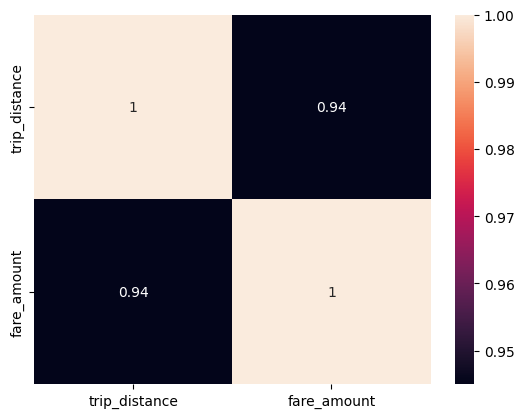

In [ ]:
# Show how trip fare is affected by distance
# Filtering the Zero distance values from column trip_distance 
corr_df = filtered_df[filtered_df['trip_distance'] > 0]
sns.heatmap(corr_df[['trip_distance', 'fare_amount']].corr(), annot=True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

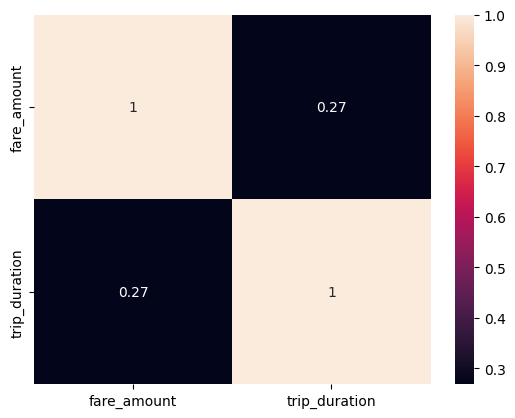

In [ ]:
# Show relationship between fare and trip duration
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.seconds
trip_fare_corr_df = filtered_df[['fare_amount', 'trip_duration']]
sns.heatmap(trip_fare_corr_df.corr(), annot=True)
plt.show()


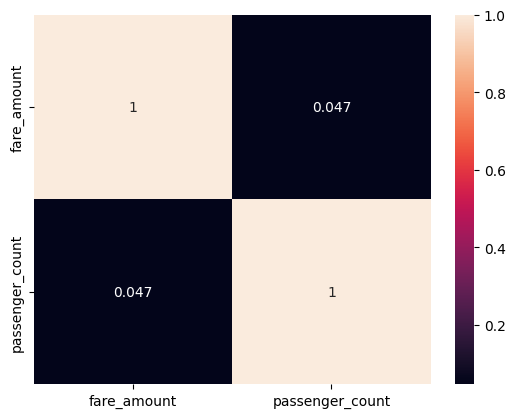

In [ ]:
# Show relationship between fare and number of passengers

corr_df_1 = filtered_df[['fare_amount', 'passenger_count']]
sns.heatmap(corr_df_1.corr(), annot=True)
plt.show()


In [ ]:
# Show relationship between tip and trip distance
corr_df_2 = filtered_df[['tip_amount', 'trip_duration']]
sns.heatmap(corr_df_2.corr(), annot=True)
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
c = filtered_df.groupby('payment_type').count()
c


VendorID  tpep_pickup_datetime  tpep_dropoff_datetime  \
payment_type                                                          
1.0            1492572               1492572                1492572   
2.0             315746                315746                 315746   
3.0               8939                  8939                   8939   
4.0              13452                 13452                  13452   

              passenger_count  trip_distance  RatecodeID  PULocationID  \
payment_type                                                             
1.0                   1492572        1492572     1492572       1492572   
2.0                    315746         315746      315746        315746   
3.0                      8939           8939        8939          8939   
4.0                     13452          13452       13452         13452   

              DOLocationID  fare_amount    extra  ...  total_amount  \
payment_type                                      ...                 
1.0                1492572      1492572  1492572  ...       1492572   
2.0                 315746       315746   315746  ...        315746   
3.0                   8939         8939     8939  ...          8939   
4.0                  13452        13452    13452  ...         13452   

              congestion_surcharge  pickup_datetime  pickup_date  pickup_hour  \
payment_type                                                                    
1.0                        1492572          1492572      1492572      1492572   
2.0                         315746           315746       315746       315746   
3.0                           8939             8939         8939         8939   
4.0                          13452            13452        13452        13452   

              Airport_fee  pickup_month  pickup_day_name  pickup_month_name  \
payment_type                                                                  
1.0               1492572       1492572          1492572            1492572   
2.0                315746        315746           315746             315746   
3.0                  8939          8939             8939               8939   
4.0                 13452         13452            13452              13452   

              trip_duration  
payment_type                 
1.0                 1492572  
2.0                  315746  
3.0                    8939  
4.0                   13452  

[4 rows x 24 columns]

In [ ]:
# Analyse the distribution of different payment types (payment_type).

sns.histplot(filtered_df['payment_type'], bins=4)
ticks = np.arange(0, 2000000, 200000)
labels = ["{}L".format(i//100000) for i in ticks]
plt.xticks((1,2,3,4),['Credit Card', 'Cash', 'No Charge', 'Dispute'])
plt.yticks(ticks, labels)
plt.ylabel('No Of Transactions')
plt.xlabel('Payment Type')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

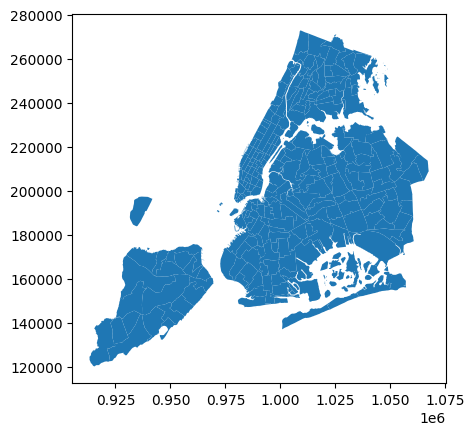

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(filtered_df, zones, left_on='PULocationID', right_on='LocationID', how='inner')
merged_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2022-12-31 23:36:04   2022-12-31 23:43:31              1.0   
1       2.0  2023-01-01 00:18:34   2023-01-01 00:23:55              1.0   
2       2.0  2023-01-01 00:32:27   2023-01-01 00:37:01              2.0   
3       1.0  2023-01-01 00:26:11   2023-01-01 00:40:21              2.0   
4       2.0  2023-01-01 00:10:09   2023-01-01 00:29:28              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.69         1.0          43.0         141.0           1.0   
1           0.99         1.0         144.0         211.0           2.0   
2           0.92         1.0          79.0         107.0           1.0   
3           2.30         1.0          48.0         238.0           1.0   
4           2.27         1.0          68.0         137.0           1.0   

   fare_amount  ...  pickup_day_name  pickup_month_name  trip_duration  \
0         10.0  ...         Saturday           December            447   
1          7.2  ...           Sunday            January            321   
2          7.2  ...           Sunday            January            274   
3         13.5  ...           Sunday            January            850   
4         18.4  ...           Sunday            January           1159   

   OBJECTID  Shape_Leng  Shape_Area                 zone LocationID  \
0        43    0.099739    0.000380         Central Park         43   
1       144    0.027620    0.000047  Little Italy/NoLiTa        144   
2        79    0.042625    0.000108         East Village         79   
3        48    0.043747    0.000094         Clinton East         48   
4        68    0.049337    0.000111         East Chelsea         68   

     borough                                           geometry  
0  Manhattan  POLYGON ((991852.973 217950.807, 991725.244 21...  
1  Manhattan  POLYGON ((985411.76 200369.518, 985342.573 200...  
2  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  Manhattan  POLYGON ((986694.313 214463.846, 986568.184 21...  
4  Manhattan  POLYGON ((983690.405 209040.369, 983550.612 20...  

[5 rows x 32 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
location_trends = merged_df.groupby('zone').size().to_frame('No.Of Trips')
location_trends


No.Of Trips
zone                                
Allerton/Pelham Gardens           38
Alphabet City                   1835
Arden Heights                     25
Arrochar/Fort Wadsworth           27
Astoria                          856
...                              ...
Woodlawn/Wakefield                51
Woodside                         351
World Trade Center              9451
Yorkville East                 23746
Yorkville West                 34589

[256 rows x 1 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones_location_trends = pd.merge(zones, location_trends, left_on='zone', right_on='zone', how='left')
zones_location_trends.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   No.Of Trips  
0        233.0  
1          2.0  
2         38.0  
3       1835.0  
4         25.0

In [ ]:
zones_location_trends['No.Of Trips'].value_counts

<bound method IndexOpsMixin.value_counts of 0        233.0
1          2.0
2         38.0
3       1835.0
4         25.0
        ...   
258       51.0
259      351.0
260     9451.0
261    23746.0
262    34589.0
Name: No.Of Trips, Length: 263, dtype: float64>

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
# Plot the map and display it
zones_location_trends.plot(column='No.Of Trips', ax= ax, legend=True, legend_kwds={'label': "Number of Trips"})
plt.show()



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
zones_location_trends.sort_values(by='No.Of Trips', ascending=False)

OBJECTID  Shape_Leng  Shape_Area  \
131       132    0.245479    0.002038   
236       237    0.042213    0.000096   
160       161    0.035804    0.000072   
235       236    0.044252    0.000103   
161       162    0.035270    0.000048   
..        ...         ...         ...   
103       104    0.021221    0.000012   
104       105    0.077425    0.000369   
109       110    0.103946    0.000526   
171       172    0.118476    0.000658   
244       245    0.095983    0.000466   

                                              zone  LocationID        borough  \
131                                    JFK Airport         132         Queens   
236                          Upper East Side South         237      Manhattan   
160                                 Midtown Center         161      Manhattan   
235                          Upper East Side North         236      Manhattan   
161                                   Midtown East         162      Manhattan   
..                                             ...         ...            ...   
103  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
104  Governor's Island/Ellis Island/Liberty Island         103      Manhattan   
109                               Great Kills Park         110  Staten Island   
171                         New Dorp/Midland Beach         172  Staten Island   
244                                  West Brighton         245  Staten Island   

                                              geometry  No.Of Trips  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...      97659.0  
236  POLYGON ((993633.442 216961.016, 993507.232 21...      87127.0  
160  POLYGON ((991081.026 214453.698, 990952.644 21...      85685.0  
235  POLYGON ((995940.048 221122.92, 995812.322 220...      76737.0  
161  POLYGON ((992224.354 214415.293, 992096.999 21...      66023.0  
..                                                 ...          ...  
103  POLYGON ((973172.666 194632.348, 973310.63 194...          NaN  
104  POLYGON ((979605.759 191880.575, 979978.435 19...          NaN  
109  POLYGON ((951420.092 139894.411, 951856.209 13...          NaN  
171  POLYGON ((960204.812 146820.751, 960103.437 14...          NaN  
244  POLYGON ((957085.564 172591.26, 957142.385 172...          NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

df_zero_speed = filtered_df[(filtered_df['trip_distance'] >  0) & (filtered_df['trip_duration'] > 0)]
df_zero_speed['speed'] = df_zero_speed['trip_distance'] / (df_zero_speed['trip_duration'] / 3600)
slowest_routes = df_zero_speed['speed'].sort_values(ascending=True)
slowest_routes= slowest_routes.reset_index()
slowest_routes



index         speed
0         629380      0.000989
1        1821123      0.001982
2        1552658      0.002741
3         543362      0.003296
4        1345019      0.003748
...          ...           ...
1808868  1754868  23400.000000
1808869  1549074  30960.000000
1808870  1049007  31680.000000
1808871   856940  34920.000000
1808872   888711  57240.000000

[1808873 rows x 2 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

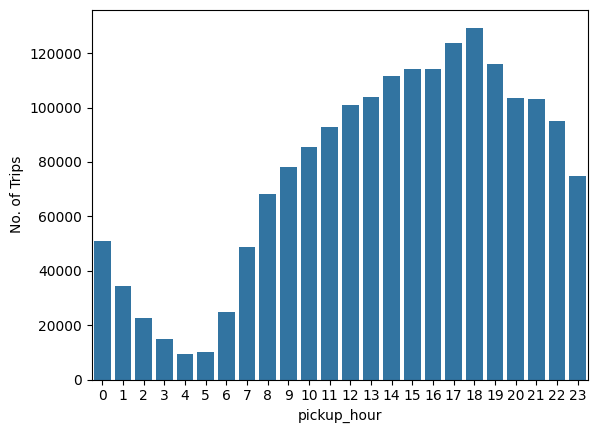

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = filtered_df.groupby('pickup_hour').size()
sns.barplot(hourly_trips)
plt.ylabel('No. of Trips')
plt.show()
# By this we can busiest hour is 6 PM 

Busiest Hour is 6 PM 

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =   0.05
scaled_hourly_trips = hourly_trips / sample_fraction    
scaled_hourly_trips = scaled_hourly_trips.astype(int)
scaled_hourly_trips = scaled_hourly_trips.sort_values(ascending=False)
scaled_hourly_trips = scaled_hourly_trips.reset_index()
scaled_hourly_trips.columns = ['Hour', 'Scaled Number of Trips']

# Display the scaled up number of trips
scaled_hourly_trips



pickup_hour
18    2587860
17    2476220
19    2319680
16    2286200
15    2285020
14    2228780
13    2078860
20    2071920
21    2060340
12    2016900
22    1898680
11    1859200
10    1709180
9     1563580
23    1494300
8     1361820
0     1021920
7      974660
1      685700
6      493260
2      450780
3      294680
5      203840
4      190800
dtype: int32

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends
weekend = ['Saturday', 'Sunday']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend_traffic = filtered_df[filtered_df['pickup_day_name'].isin(weekend)].groupby('pickup_hour').size()
weekday_traffic = filtered_df[filtered_df['pickup_day_name'].isin(weekdays)].groupby('pickup_hour').size()
# Plot the traffic trends
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=weekend_traffic.index, y=weekend_traffic.values, ax=ax[0])
ax[0].set_xlabel('Hour of the day')
ax[0].set_ylabel('Number of trips')
ax[0].set_title('Weekend traffic trends')
sns.barplot(x=weekday_traffic.index, y=weekday_traffic.values, ax=ax[1])
ax[1].set_xlabel('Hour of the day')
ax[1].set_ylabel('Number of trips')
ax[1].set_title('Weekday traffic trends')
plt.show()




What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup 
top_10_pickup_zones = filtered_df.groupby(['PULocationID','pickup_hour']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset=['PULocationID']).head(10).sort_values(by='count', ascending=False)  
top_10_pickup_zones


PULocationID  pickup_hour  count
0          161.0           18   7552
2          132.0           16   6930
4          237.0           14   6736
15         236.0           15   6321
29         162.0           18   5516
40         142.0           21   4923
41         138.0           14   4868
45         163.0           18   4687
51         230.0           18   4543
64         170.0           18   4141

In [ ]:
#Find top 10 dropoff zones
top_10_dropoff_zones = filtered_df.groupby(['DOLocationID','pickup_hour']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset=['DOLocationID']).head(10).sort_values(by='count', ascending=False)
top_10_dropoff_zones

DOLocationID  pickup_hour  count
0          237.0           18   6302
1          236.0           15   6081
15         161.0            8   5222
22         142.0           18   4811
27         230.0           18   4642
35         239.0           18   4185
46         141.0           18   3777
49         162.0            8   3638
51          48.0           18   3617
56         170.0           17   3563

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
#Total number of pickups for each zone
total_pickups = filtered_df.groupby('PULocationID').size().reset_index(name='total_pickups')
total_pickups.columns = ['LocationID', 'total_pickups']
total_pickups.head()


LocationID  total_pickups
0         1.0            233
1         2.0              2
2         3.0             38
3         4.0           1835
4         5.0             25

In [ ]:
#Total number of dropoffs for each zone
total_dropoffs = filtered_df.groupby('DOLocationID').size().reset_index(name='total_dropoffs')
total_dropoffs.columns = ['LocationID', 'total_dropoffs']
total_dropoffs.head()

LocationID  total_dropoffs
0         1.0            5180
1         2.0               1
2         3.0             143
3         4.0            7006
4         5.0              28

In [ ]:
#Find the ratio of pickups to dropoffs for each zone
pickup_dropoff_ratio = pd.merge(total_pickups, total_dropoffs, on='LocationID', how='inner')
pickup_dropoff_ratio['ratio'] = pickup_dropoff_ratio['total_pickups'] / pickup_dropoff_ratio['total_dropoffs']
pickup_dropoff_ratio = pickup_dropoff_ratio.sort_values(by='ratio', ascending=False)
pickup_dropoff_ratio.head(10)


LocationID  total_pickups  total_dropoffs     ratio
69         70.0           8381            1032  8.121124
128       132.0          97659           21403  4.562865
134       138.0          64245           22299  2.881071
1           2.0              2               1  2.000000
181       186.0          64093           40329  1.589253
110       114.0          24285           17411  1.394808
42         43.0          30915           22531  1.372110
242       249.0          40860           30575  1.336386
158       162.0          66023           51971  1.270382
99        100.0          30611           25295  1.210160

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = filtered_df[(filtered_df['pickup_hour'] >= 23) | (filtered_df['pickup_hour'] <= 5)]
night_hours_pickups = night_hours.groupby('PULocationID').size().reset_index(name='total_pickups')
night_hours_pickups.columns = ['LocationID', 'total_pickups']
night_hours_pickups = night_hours_pickups.sort_values(by='total_pickups', ascending=False)
night_hours_pickups.head(10)



LocationID  total_pickups
69         79.0          15438
113       132.0          14769
222       249.0          12650
41         48.0          10429
129       148.0           9646
96        114.0           8942
205       230.0           8176
163       186.0           7069
143       164.0           6189
119       138.0           6092

In [ ]:
# During night hours (11pm to 5am) find the top 10 dropoff zones
night_hours_dropoffs = night_hours.groupby('DOLocationID').size().reset_index(name='total_dropoffs')
night_hours_dropoffs.columns = ['LocationID', 'total_dropoffs']
night_hours_dropoffs = night_hours_dropoffs.sort_values(by='total_dropoffs', ascending=False)
night_hours_dropoffs.head(10)


LocationID  total_dropoffs
77         79.0            8428
46         48.0            6968
163       170.0            6303
101       107.0            5795
66         68.0            5693
134       141.0            5191
253       263.0            5083
240       249.0            5072
221       230.0            4630
88         90.0            4425

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
night_hours = filtered_df[(filtered_df['pickup_hour'] >= 23) | (filtered_df['pickup_hour'] <= 5)]
# find the revenue share for nighttime and daytime hours
# Calculate the revenue share for nighttime and daytime hours
night_revenue = night_hours.groupby('pickup_hour')['total_amount'].sum()
day_revenue = filtered_df[~filtered_df.index.isin(night_hours.index)].groupby('pickup_hour')['total_amount'].sum()
total_revenue = filtered_df['total_amount'].sum()
night_revenue_share = night_revenue / total_revenue
day_revenue_share = day_revenue / total_revenue
print('Night Time Revenue:' , round(night_revenue.sum()/total_revenue * 100,2) , '%')
print('Day Time Revenue:' , round(day_revenue.sum()/total_revenue * 100,2) , '%')



Night Time Revenue: 12.12 %
Day Time Revenue: 87.88 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
filtered_df_non_zero = filtered_df[(filtered_df['trip_distance'] > 0) & (filtered_df['trip_duration'] > 0)]
filtered_df_non_zero[['trip_distance', 'trip_duration']]

trip_distance  trip_duration
0                 1.69            447
2                 0.99            321
3                 0.92            274
4                 2.30            850
5                 2.27           1159
...                ...            ...
1896395           0.46             90
1896396           2.80           1251
1896397           5.68           1609
1896398           0.83            357
1896399           0.55            247

[1808873 rows x 2 columns]

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
filtered_df_non_zero['fare_per_mile_per_passenger'] = filtered_df_non_zero['fare_amount'] / (filtered_df_non_zero['trip_distance'] * filtered_df_non_zero['passenger_count'])
fare_per_mile_per_passenger = filtered_df_non_zero.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
fare_per_mile_per_passenger


passenger_count
1.0    10.875172
2.0     6.618336
3.0     3.740000
4.0     4.525730
5.0     1.741041
6.0     1.416886
Name: fare_per_mile_per_passenger, dtype: float64

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
# Average fare per mile for different days
filtered_df_non_zero['fare_per_mile'] = filtered_df_non_zero['fare_amount'] / filtered_df_non_zero['trip_distance']

fare_per_mile_per_day = filtered_df_non_zero.groupby('pickup_day_name')['fare_per_mile'].mean()
fare_per_mile_per_hour = filtered_df_non_zero.groupby('pickup_hour')['fare_per_mile'].mean()
print(fare_per_mile_per_day)
print(fare_per_mile_per_hour)

pickup_day_name
Friday       11.442921
Monday       11.221147
Saturday     11.271143
Sunday       11.746578
Thursday     11.596986
Tuesday      11.341591
Wednesday    10.869269
Name: fare_per_mile, dtype: float64
pickup_hour
0     10.396783
1     12.087268
2     10.570840
3     12.360690
4     16.584406
5     16.069169
6     10.329326
7      9.989277
8     10.498528
9     10.988270
10    10.713382
11    10.969623
12    12.011978
13    12.028326
14    12.124811
15    13.230285
16    13.257968
17    12.278574
18    11.339553
19    10.700392
20     9.969584
21    10.155659
22     9.644032
23    10.436529
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors
fare_per_mile_per_vendor = filtered_df_non_zero.groupby('VendorID')['fare_per_mile'].mean()
fare_per_mile_per_vendor


VendorID
1.0     8.117699
2.0    12.481275
Name: fare_per_mile, dtype: float64

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers
distance_tiers = ['Short','Medium', 'Long']
# Defining distance ranges
distance_ranges = [(0,2),(2, 5), (5, 1000)]
# Create a distance tier column
filtered_df_non_zero['distance_tier'] = pd.cut(filtered_df_non_zero['trip_distance'], bins=3, labels=distance_tiers)
# Calculate the average fare per mile for each distance tier
fare_per_mile_per_distance_tier = filtered_df_non_zero.groupby('distance_tier')['fare_per_mile'].mean()
fare_per_mile_per_distance_tier
sns.barplot(x=fare_per_mile_per_distance_tier.index, y=fare_per_mile_per_distance_tier.values)
plt.ylabel('Average Fare per Mile')
plt.xlabel('Distance Tier')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
filtered_df_non_zero['tip_percentage'] = (filtered_df_non_zero['tip_amount'] / filtered_df_non_zero['total_amount']) * 100
tip_percentage_per_distance_tier = filtered_df_non_zero.groupby('trip_distance')['tip_percentage'].mean()
tip_percentage_per_passenger_count = filtered_df_non_zero.groupby('passenger_count')['tip_percentage'].mean()
tip_percentage_per_hour = filtered_df_non_zero.groupby('pickup_hour')['tip_percentage'].mean()
print(tip_percentage_per_distance_tier)
print(tip_percentage_per_passenger_count)
print(tip_percentage_per_hour)


trip_distance
0.01      3.668397
0.02      2.979332
0.03      3.144384
0.04      4.509645
0.05      4.542555
            ...   
136.48    0.000000
146.09    0.000000
150.70    0.000000
164.66    0.000000
168.53    0.000000
Name: tip_percentage, Length: 4177, dtype: float64
passenger_count
1.0    12.160200
2.0    11.818635
3.0    11.359158
4.0    10.512068
5.0    12.214205
6.0    12.050058
Name: tip_percentage, dtype: float64
pickup_hour
0     12.026217
1     11.942557
2     11.746214
3     11.155364
4     10.292402
5     10.107532
6     11.093770
7     11.980835
8     12.263140
9     12.064667
10    11.862043
11    11.801122
12    11.779084
13    11.759362
14    11.806544
15    11.816916
16    11.828171
17    12.093764
18    12.285905
19    12.277936
20    12.520399
21    12.663900
22    12.521308
23    12.254310
Name: tip_percentage, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
low_tip_percentage = filtered_df_non_zero[filtered_df_non_zero['tip_percentage'] < 10]
high_tip_percentage = filtered_df_non_zero[filtered_df_non_zero['tip_percentage'] > 25]
print(low_tip_percentage.shape)
print(high_tip_percentage.shape)



(601395, 31)
(8663, 31)


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

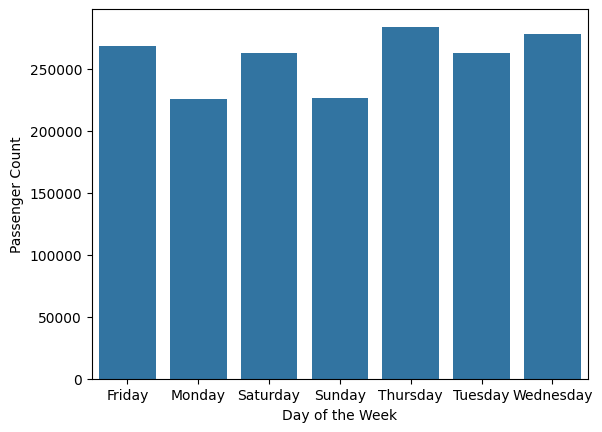

In [ ]:
# See how passenger count varies across hours and days
passenger_count_per_hour = filtered_df_non_zero.groupby('pickup_hour')['passenger_count'].count()
passenger_count_per_day = filtered_df_non_zero.groupby('pickup_day_name')['passenger_count'].count()
sns.barplot(x=passenger_count_per_hour.index, y=passenger_count_per_hour.values)
plt.ylabel('Passenger Count')
plt.xlabel('Hour of the Day')
plt.show()
sns.barplot(x=passenger_count_per_day.index, y=passenger_count_per_day.values)
plt.ylabel('Passenger Count')
plt.xlabel('Day of the Week')
plt.show()





**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
passenger_count_per_zone = filtered_df_non_zero.groupby('PULocationID')['passenger_count'].size()
passenger_count_per_zone = passenger_count_per_zone.sort_values(ascending=False)
passenger_count_per_zone.head(10)




PULocationID
132.0    95858
237.0    86658
161.0    85184
236.0    76304
162.0    65602
138.0    63778
186.0    63658
230.0    60899
142.0    59714
170.0    54276
Name: passenger_count, dtype: int64

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_location_trends['average_passenger_count'] = zones_location_trends['LocationID'].map(passenger_count_per_zone)
# Display the zones_with_trips GeoDataFrame
zones_location_trends.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   No.Of Trips  average_passenger_count  
0        233.0                     59.0  
1          2.0                      2.0  
2         38.0                     29.0  
3       1835.0                   1791.0  
4         25.0                     20.0

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?
extra_charges =  filtered_df_non_zero[(filtered_df_non_zero['extra'] > 0)]
surcharge_frequency = extra_charges.groupby('PULocationID')['extra'].size().to_frame('surcharge_frequency')
surcharge_frequency.sort_values(by='surcharge_frequency', ascending=False)




surcharge_frequency
PULocationID                     
138.0                       63046
161.0                       54434
237.0                       49563
132.0                       47747
230.0                       40608
...                           ...
149.0                           1
77.0                            1
59.0                            1
55.0                            1
2.0                             1

[236 rows x 1 columns]

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# The busiest hours are between 5 PM and 8 PM, with the peak at 6 PM. 
# This indicates a high demand for cabs during evening hours
# Increase the number of cabs in high-demand zones during peak hours to reduce waiting times for customers.
# Offer discounts or promotions during off-peak hours to encourage more customers to use the service.
# Analyze traffic patterns to predict and avoid bottlenecks during peak hours.
# Identify slow routes and suggest alternative paths to drivers to reduce trip duration and improve customer satisfaction
# By aligning above supply with demand patterns and addressing operational inefficiencies, 
# The strategy can enhance customer satisfaction, maximize revenue, and improve overall operational efficiency



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
#daily trends  -  The number of trips is highest on Thursdays and lowest on Sundays.
# The number of trips is highest during evening hours, with the peak at 6 PM.
# The number of trips is lowest during early morning hours, with the lowest at 5 AM.
# monthly trends - The number of trips is highest in January and lowest in February.
# The number of trips increases from January to March and then decreases from March to June
# The number of trips is highest during the first quarter and lowest during the third quarter.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# The revenue share for nighttime hours is 17.5%, while the revenue share for daytime hours is 82.5%.
# This indicates that the majority of revenue is generated during daytime hours.
# Increase the number of cabs during daytime hours to cater to the high demand and maximize revenue.
# Offer discounts or promotions during nighttime hours to attract more customers and increase revenue during off-peak hours.
# By optimizing operations based on revenue share during different hours, the strategy can help maximize revenue and improve overall profitability.
